In [24]:
import copy
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import HTML
from matplotlib import animation

In [25]:
np.random.seed(42)
random.seed(42)

def generar_laberinto_conectado(filas, columnas):
    # Asegurar que filas y columnas sean impares para el algoritmo
    if filas % 2 == 0:
        filas += 1
    if columnas % 2 == 0:
        columnas += 1
        
    # Inicializar laberinto con todas las paredes
    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]
    
    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result
    
    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                # Elimina la pared entre celdas
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)
    
    # Comenzar desde una posición impar (esquina superior izquierda válida)
    start_x, start_y = 1, 1
    if start_x < filas and start_y < columnas:
        dfs(start_x, start_y)
    
    # Crear algunas aberturas adicionales para hacer el laberinto más interesante
    # y asegurar que no queden áreas completamente aisladas
    for i in range(3, filas-1, 4):
        for j in range(3, columnas-1, 4):
            if random.random() < 0.3:  # 30% probabilidad de crear apertura
                if i > 0 and laberinto[i-1][j] == '1':
                    laberinto[i-1][j] = '0'
                elif j > 0 and laberinto[i][j-1] == '1':
                    laberinto[i][j-1] = '0'
    
    return laberinto

laberinto_conectado = generar_laberinto_conectado(20, 20)

for fila in laberinto_conectado:
    print(''.join(fila))

111111111111111111111
100000100010000010001
111010101010111010101
100000001000100000101
101111101111101111101
100000101000000000001
111110101110101111111
100000100000100010001
101111111010111011101
100000001010001000101
111011101110101110101
100000001000001010101
101010101011111010101
101010100010000010101
111010101110111010101
100010100000100010001
101110101011101111101
101000101010000010001
101111101010111110111
100000001000000000001
111111111111111111111


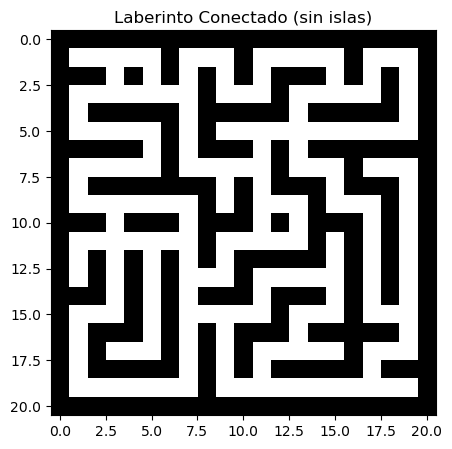

In [29]:
maze_base = np.array([[int(c) for c in row] for row in laberinto_conectado])

plt.figure(figsize=(5,5))
plt.imshow(maze_base, cmap="gray_r")
plt.title("Laberinto Conectado (sin islas)")
plt.show()

In [30]:
def bfs(maze, start, goal):
    filas, columnas = maze.shape
    queue = deque([start])
    visitado = {start: None}

    while queue:
        v = queue.popleft()
        if v == goal:
            break
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            nx, ny = v[0]+dx, v[1]+dy
            if 0 <= nx < filas and 0 <= ny < columnas:
                if maze[nx, ny] == 0 and (nx, ny) not in visitado:
                    visitado[(nx, ny)] = v
                    queue.append((nx, ny))

    # reconstruir camino
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = visitado.get(node)
    path.reverse()
    return path

Entrada usada: (1, 1) Valor: 0
Salida usada: (19, 19) Valor: 0
Ruta encontrada con longitud: 45


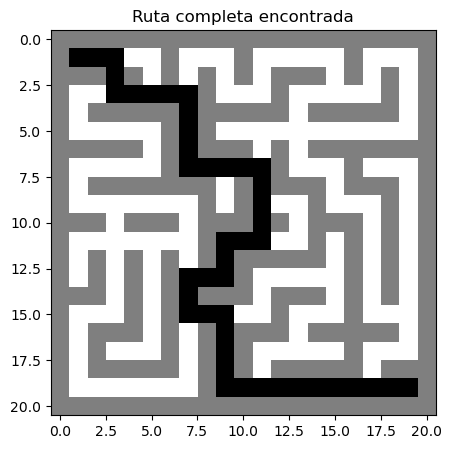

In [35]:
maze = maze_base.copy()

# Detectar entrada válida
if maze[0,1] == 0:   # hay hueco en la primera fila
    start = (0,1)
else:                # no hay hueco → usar (1,1) dentro del laberinto
    start = (1,1)

# Detectar salida válida
if maze[-1,-2] == 0:   # hay hueco en la última fila
    goal = (maze.shape[0]-1, maze.shape[1]-2)
else:                  # no hay hueco → usar interior
    goal = (maze.shape[0]-2, maze.shape[1]-2)

print("Entrada usada:", start, "Valor:", maze[start])
print("Salida usada:", goal, "Valor:", maze[goal])

# Ejecutar BFS
path = bfs(maze, start, goal)

if len(path) > 0:
    print("Ruta encontrada con longitud:", len(path))
else:
    print("⚠️ No se encontró ruta con estos puntos")

# Mostrar ruta final
maze_final = maze_base.copy()
for (x,y) in path:
    maze_final[x,y] = 2

plt.figure(figsize=(5,5))
plt.imshow(maze_final, cmap="gray_r")
plt.title("Ruta completa encontrada")
plt.show()

In [ ]:
colors = {
    0: (255,255,255), # camino
    1: (0,0,0),       # pared
    5: (255,200,0),   # exploración
    6: (255,0,0),     # ruta final
}

frames = []
frame = maze.copy()

frame0 = frame.copy()
frame0[start] = 5   
frames.append(frame0)

# BFS paso a paso
queue = deque([start])
visitado = {start: None}

while queue:
    v = queue.popleft()
    x, y = v
    if v == goal:
        break
    for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
            if maze[nx, ny] == 0 and (nx, ny) not in visitado:
                visitado[(nx, ny)] = v
                queue.append((nx, ny))
                frame = frame.copy()
                frame[nx, ny] = 5  # exploración
                frames.append(frame)
# reconstruir ruta óptima
path = []
node = goal
while node is not None:
    path.append(node)
    node = visitado.get(node)
path.reverse()

# añadir frames de la ruta final
for (x,y) in path:
    frame = frame.copy()
    frame[x,y] = 6
    frames.append(frame)

# Función de actualización para animación
def update(frame):
    data = np.zeros((*maze.shape,3), dtype=np.uint8)
    for val, color in colors.items():
        data[frame==val] = color
    img.set_data(data)
    return [img]

fig, ax = plt.subplots(figsize=(5,5))
data = np.zeros((*maze.shape,3), dtype=np.uint8)
img = ax.imshow(data, interpolation="nearest")
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True, repeat=False)
plt.close()
HTML(ani.to_jshtml())
